In [ ]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/weight-height .csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
#We will be building a Regression model to predict the weight for given height
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
data['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [ ]:
#Collecting X and Y
X = data.values[:,1]
X

array([73.847017017515, 68.78190404589029, 74.11010539178491, ...,
       63.8679922137577, 69.03424313073461, 61.944245879517204],
      dtype=object)

In [ ]:
Y = data.values[:,2]
Y

array([241.893563180437, 162.3104725213, 212.7408555565, ...,
       128.475318784122, 163.852461346571, 113.64910267531201],
      dtype=object)

In [ ]:
#Calculating mean(X) and mean(Y)
mean_x = np.mean(X)
print(mean_x)
mean_y = np.mean(Y)
print(mean_y)

66.36755975482106
161.44035683283076


In [ ]:
#OLS - Ordinary Least Squares
n = len(X) #no of items in input
#to calculate b1 and b0 --> y = b1x + b0
numer = 0
denom = 0
for i in range(n):
  numer += (X[i]-mean_x)*(Y[i]-mean_y)
  denom += (X[i]-mean_x)**2
b1 = numer / denom
b0 = mean_y - (b1*mean_x)
print(b1)
print(b0)

7.717287640785376
-350.7371918121347


In [ ]:
print("The Linear Model is",b1,b0)

The Linear Model is 7.717287640785376 -350.7371918121347


In [ ]:
print("The Linear Model is Y = {:.3}x + {:.4}".format(b1,b0))

The Linear Model is Y = 7.72x + -350.7


In [ ]:
max_x = np.max(X) + 10
min_x = np.min(X) -10 
print(max_x)
print(min_x)

88.99874234638959
44.2631333250971


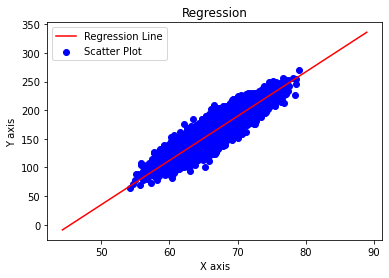

In [ ]:
#plotting values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) -10
#Calculating the line values
x = np.linspace(max_x,min_x,1000)
y = b1*x + b0
#Plotting Line
plt.plot(x,y,color = 'red',label = "Regression Line")
plt.scatter(X,Y,color = "blue",label = "Scatter Plot")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Regression")
plt.legend()
plt.show()

In [ ]:
X[2]

74.11010539178491

In [ ]:
#Prediction 
y_pred = b0 + b1*X[2]
y_pred

221.1918085851886

In [ ]:
X[2]

74.11010539178491

In [ ]:
#Calculating R^2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
  y_pred = b0 + b1*X[i] #for predicted values
  ss_tot += (Y[i]-mean_y)**2
  ss_res += (Y[i]-y_pred)**2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.8551742120609955


In [ ]:
#By using Scikt-Learn
from sklearn.linear_model import LinearRegression

In [ ]:
#Collecting the data
#Apply to model
#Prediction
X = data.values[:,1].reshape(-1,1)
Y = data.values[:,2].reshape(-1,1)

In [ ]:
reg =LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = reg.predict(X)

In [ ]:
prediction

array([[219.16147993],
       [180.07254619],
       [221.19180859],
       ...,
       [142.15047514],
       [182.01991949],
       [127.30437133]])

In [ ]:
#R2 Score
r2score = reg.score(X,Y)
print("R2 Score",r2score)

R2 Score 0.8551742120609956


In [ ]:
reg.predict([[74]])

array([[220.34209361]])

In [ ]:
'''What if your data is actually more complex than a simple straight line?
Surprisingly you can actually use a liner model to fit non-linear data.A simple way to do is add powers of each feature as new features,then train our linear model on this extended set of features.
This technique is called "Polynomial Regression'''

In [ ]:
#Lets look at the following example
import numpy as np
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

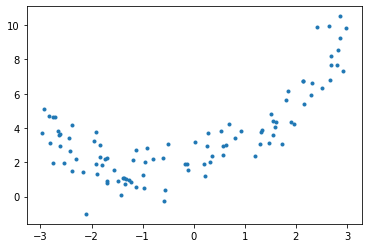

In [ ]:
plt.plot(X,y,'.')

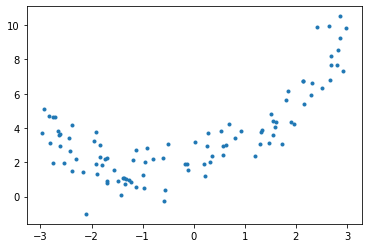

In [ ]:
#Visulization 
import matplotlib.pyplot as plt
plt.plot(X,y,'.')
plt.show()

Clearly a straight line will never fit this data properly,so we need to use scikit-learn's Polynomial Features class to transform the training data by adding the square(2nd degree polynomial)to each of the training set as a new feature.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,
                                   include_bias=False)

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]
#X_poly[0]

array([0.64076833])

In [ ]:
X_poly[0]

array([0.64076833, 0.41058405])

X_poly contains the original feature of X plus the square of the feature,now we can clearly fit the linear regression model to this extended training data

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78135532]), array([[0.88556755, 0.54143279]]))

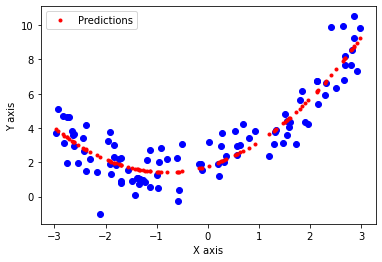

In [ ]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin_reg.predict(poly_features.transform(X)),'.',color = "red",
         label = "Predictions")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

In [ ]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

***Attribute Information (in order):
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n   INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's***

In [ ]:
#boston_dataset is a dictionary 
#let's check the datset what it contains
boston_dataset.keys()
#boston_dataset.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The target value is missing from the data.Create a new column of target values and add it to data frame

In [ ]:
boston['MEDV'] = boston_dataset.target
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
#check for the missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


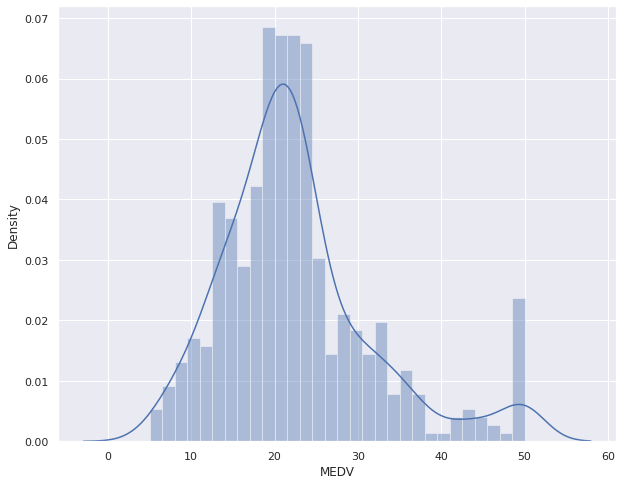

In [ ]:
#set the size of the figure 
sns.set(rc={'figure.figsize':(10,8)})
#plot a histogram showing the distribution of the 
#target values
sns.distplot(boston['MEDV'],bins=30)
plt.show()

In [ ]:
#Correlation is a basic quantity for many modelling 
#techniques,it helps in predicting one attribute from 
#another 
#correlation matrix to compute the pair wise correlation
# for all columns
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


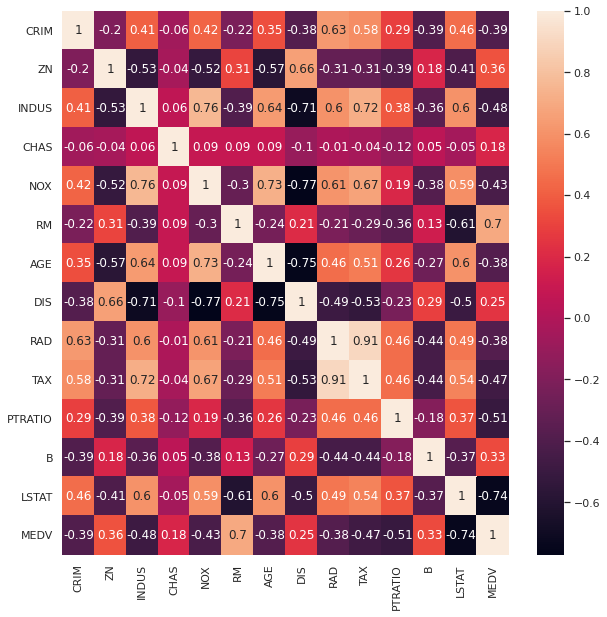

In [ ]:
#Use the heatmap function from seaborn to plot the correlation matrix 
#Plot rectangular data as color encoded matrix 
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=correlation_matrix,annot=True)
#annot = True to print the values inside the square
plt.show()

Observations are from the above correlation plot we can see that MEDV is strongly correlated to RM,LSTAT RAD and TAX are strongly correlated,so we don't those features together to avoid multi-collinearity

In [ ]:
#Prepare the data for training
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],
                 columns = ['LSTAT','RM'])
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [ ]:
y = boston['MEDV']
#y

In [ ]:
#randomstate is basically used for reproducing the same every time it is run.
#If you do not use a random state in a traintest split,every time you make the split you might get a different set of train
#and test data points
#Lets undetrstand it with an example
from sklearn.model_selection import train_test_split
a,b = np.arange(10).reshape(5,2),range(5)
print(a)
print(b)
train_test_split(a,b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


[array([[0, 1],
        [2, 3],
        [4, 5]]), array([[6, 7],
        [8, 9]]), [0, 1, 2], [3, 4]]

In [ ]:
train_test_split(a,b)

[array([[2, 3],
        [6, 7],
        [4, 5]]), array([[8, 9],
        [0, 1]]), [1, 3, 2], [4, 0]]

In [ ]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [ ]:
#Splits the training and test dataset in 80%:20%
#assign the random_state to any value.This ensures consistency
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state = 5)
#print(X_train)
#print(X_test)
#print(X_train.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)
print(rmse)
print(r2)
'''print("The model performance of training set")
print("---------------------------------")
print("RMSE is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")'''

#model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)

print("The model performance of testing set")
print("---------------------------------")
print("RMSE is {}".format(rmse))
print("R2 Score is {}".format(r2))

5.6371293350711955
0.6300745149331701
The model performance of testing set
---------------------------------
RMSE is 5.137400784702911
R2 Score is 0.6628996975186952


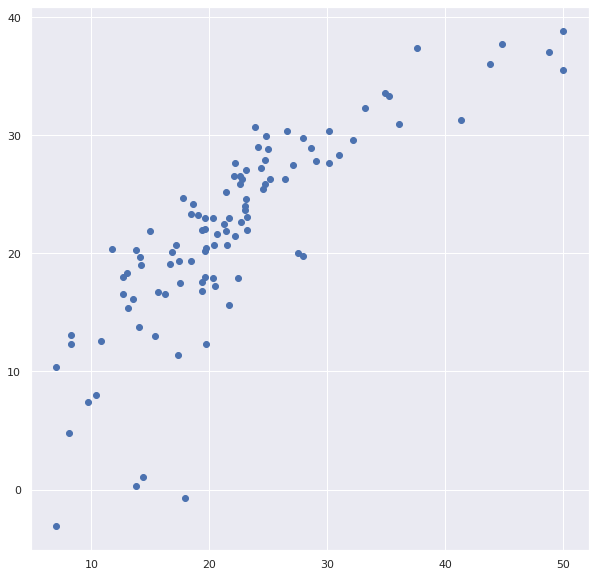

In [ ]:
#plotting the y_test vs y_pred
#idealy it should be a straight line
plt.scatter(Y_test,y_test_predict)
plt.show()

Polynomial Regression should be applied as it is not varying in a linear way we take up degree 2 and test

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)
#transform the features to higher degree features 
X_train_poly = poly_features.fit_transform(X_train)
#fit the transformed features to Linear Regression
poly_model =LinearRegression()
poly_model.fit(X_train_poly,Y_train)
#predicting on the training dataset
y_train_predicted = poly_model.predict(X_train_poly)
#predicting on the testing dataset
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
#evaluating the model on the training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predicted))
r2_train = r2_score(Y_train,y_train_predicted)
#evaluating the model on the testing dataset
rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predicted))
r2_test = r2_score(Y_test,y_test_predicted)
print("The model performance of testing set")
print("---------------------------------")
print("RMSE of training set  is {}".format(rmse_train))
print("R2 Score is {}".format(r2_train))
print("\n")

print("The model performance of testing set")
print("---------------------------------")
print("RMSE of training set  is {}".format(rmse_test))
print("R2 Score is {}".format(r2_test))

The model performance of testing set
---------------------------------
RMSE of training set  is 4.703071027847756
R2 Score is 0.7425094297364765


The model performance of testing set
---------------------------------
RMSE of training set  is 3.784819884545044
R2 Score is 0.8170372495892174


In [ ]:
#We can observe that the error rate has been decreased after using Polynomial Regression as compared to Linear Regression
a = poly_model.predict(poly_features.fit_transform([[9.14,6.4]]))
a

array([24.22493632])